In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING DATASET

In [5]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/borg_traces_data.csv")   # or update path if moved
df.head()


,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,...,0.014435,0.000415,NaN,NaN,1.0,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,...,0.000000,0.000000,NaN,NaN,1.0,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,...,0.010422,0.000235,0.939919,0.001318,1.0,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,...,0.041626,0.000225,1.359102,0.007643,1.0,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,...,0.000272,0.000010,NaN,NaN,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


In [6]:
df.columns


Index(['Unnamed: 0', 'time', 'instance_events_type', 'collection_id',
       'scheduling_class', 'collection_type', 'priority',
       'alloc_collection_id', 'instance_index', 'machine_id',
       'resource_request', 'constraint', 'collections_events_type', 'user',
       'collection_name', 'collection_logical_name',
       'start_after_collection_ids', 'vertical_scaling', 'scheduler',
       'start_time', 'end_time', 'average_usage', 'maximum_usage',
       'random_sample_usage', 'assigned_memory', 'page_cache_memory',
       'cycles_per_instruction', 'memory_accesses_per_instruction',
       'sample_rate', 'cpu_usage_distribution', 'tail_cpu_usage_distribution',
       'cluster', 'event', 'failed'],
      dtype='object')

In [7]:
df.shape

(405894, 34)

In [8]:
Columns: ['timestamp', 'cpu_usage', 'mem_usage', ...]
Shape: (4,200,000, 12)

DATA CLEANING

In [9]:
df = df[[
    "time",
    "machine_id",
    "average_usage",
    "maximum_usage",
    "assigned_memory",
    "page_cache_memory",
    "cycles_per_instruction",
    "memory_accesses_per_instruction",
]]
df.head()


,time,machine_id,average_usage,maximum_usage,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction
0,0,168846390496,"{'cpus': 0.00466156005859375, 'memory': 0.0059...","{'cpus': 0.01190185546875, 'memory': 0.0059356...",0.014435,0.000415,NaN,NaN
1,2517305308183,85515092,"{'cpus': 0.0, 'memory': 9.5367431640625e-07}","{'cpus': 0.0, 'memory': 9.5367431640625e-07}",0.000000,0.000000,NaN,NaN
2,195684022913,169321752432,"{'cpus': 0.024200439453125, 'memory': 0.002788...","{'cpus': 0.06005859375, 'memory': 0.0028457641...",0.010422,0.000235,0.939919,0.001318
3,0,178294817221,"{'cpus': 0.047607421875, 'memory': 0.034423828...","{'cpus': 0.13330078125, 'memory': 0.03466796875}",0.041626,0.000225,1.359102,0.007643
4,1810627494172,231364893292,"{'cpus': 0.000270843505859375, 'memory': 7.629...","{'cpus': 0.00041484832763671875, 'memory': 7.6...",0.000272,0.000010,NaN,NaN


In [10]:
df = df.sort_values("time").reset_index(drop=True)


In [12]:
df["time"] = pd.to_datetime(df["time"], unit="ns")


In [13]:
df = df.dropna(subset=["average_usage"])


In [14]:
df.shape
df.head()
df.isna().sum()


,0
time,0
machine_id,0
average_usage,0
maximum_usage,0
assigned_memory,0
page_cache_memory,0
cycles_per_instruction,124688
memory_accesses_per_instruction,124688


In [15]:
df = df.sort_values(by="time").reset_index(drop=True)


In [16]:
df["hour"] = df["time"].dt.hour
df["day"] = df["time"].dt.day
df["weekday"] = df["time"].dt.weekday


In [17]:
df["avg_lag_1"] = df["average_usage"].shift(1)
df["avg_lag_2"] = df["average_usage"].shift(2)
df["avg_lag_5"] = df["average_usage"].shift(5)
df["avg_lag_10"] = df["average_usage"].shift(10)


FEATURE ENGENEERING

In [19]:
import ast
import numpy as np
import pandas as pd

def extract_cpu(val):
    """Return the 'cpus' value from the dict-like string."""
    if pd.isna(val):
        return np.nan

    # if it's already a dict (sometimes happens)
    if isinstance(val, dict):
        return float(val.get("cpus", np.nan))

    try:
        d = ast.literal_eval(val)   # convert string -> dict
        return float(d.get("cpus", np.nan))
    except Exception:
        return np.nan

# Create clean numeric columns
df["avg_cpu"] = df["average_usage"].apply(extract_cpu)
df["max_cpu"] = df["maximum_usage"].apply(extract_cpu)

# Optional: drop rows where we couldn't parse CPU
df = df.dropna(subset=["avg_cpu"]).reset_index(drop=True)

df[["average_usage", "avg_cpu"]].head()


,average_usage,avg_cpu
0,"{'cpus': 0.00392913818359375, 'memory': 0.0162...",0.003929
1,"{'cpus': 7.915496826171875e-05, 'memory': 0.00...",0.000079
2,"{'cpus': 0.003376007080078125, 'memory': 0.000...",0.003376
3,"{'cpus': 0.0042266845703125, 'memory': 0.00102...",0.004227
4,"{'cpus': 0.00018405914306640625, 'memory': 0.0...",0.000184


In [20]:
df["avg_cpu"].dtype


dtype('float64')

In [21]:
# time features (if not already done)
df["hour"] = df["time"].dt.hour
df["day"] = df["time"].dt.day
df["weekday"] = df["time"].dt.weekday

# lag features
df["avg_lag_1"] = df["avg_cpu"].shift(1)
df["avg_lag_2"] = df["avg_cpu"].shift(2)
df["avg_lag_5"] = df["avg_cpu"].shift(5)
df["avg_lag_10"] = df["avg_cpu"].shift(10)

# rolling features
df["avg_roll_mean_5"]  = df["avg_cpu"].rolling(window=5).mean()
df["avg_roll_std_5"]   = df["avg_cpu"].rolling(window=5).std()
df["avg_roll_mean_10"] = df["avg_cpu"].rolling(window=10).mean()
df["avg_roll_std_10"]  = df["avg_cpu"].rolling(window=10).std()

# prediction target: CPU one step in the future
df["target_future_usage"] = df["avg_cpu"].shift(-1)

# drop NaNs from shifts/rollings
df = df.dropna().reset_index(drop=True)

df.head(), df.shape


(        time   machine_id                                      average_usage  \
 0 1970-01-01  28727353368  {'cpus': 0.0115814208984375, 'memory': 9.72747...   
 1 1970-01-01  10367640231  {'cpus': 0.030303955078125, 'memory': 0.009429...   
 2 1970-01-01  96914493816  {'cpus': 0.0128021240234375, 'memory': 0.00230...   
 3 1970-01-01  38562462153  {'cpus': 0.025421142578125, 'memory': 0.007827...   
 4 1970-01-01  27366897782  {'cpus': 0.002651214599609375, 'memory': 0.001...   
 
                                        maximum_usage  assigned_memory  \
 0  {'cpus': 0.0830078125, 'memory': 0.00010776519...         0.000000   
 1  {'cpus': 0.0703125, 'memory': 0.0095062255859375}         0.000000   
 2  {'cpus': 0.0460205078125, 'memory': 0.00237655...         0.005211   
 3  {'cpus': 0.0826416015625, 'memory': 0.00854492...         0.010620   
 4  {'cpus': 0.01043701171875, 'memory': 0.0022010...         0.003906   
 
    page_cache_memory  cycles_per_instruction  memory_accesses_per

TRAINING THE MODEL/ TRAIN TEST SPLIT

In [22]:
from sklearn.model_selection import train_test_split

# Features to use
features = [
    "avg_cpu",
    "max_cpu",
    "assigned_memory",
    "page_cache_memory",
    "cycles_per_instruction",
    "memory_accesses_per_instruction",
    "hour", "day", "weekday",
    "avg_lag_1", "avg_lag_2", "avg_lag_5", "avg_lag_10",
    "avg_roll_mean_5", "avg_roll_std_5",
    "avg_roll_mean_10", "avg_roll_std_10",
]

X = df[features]
y = df["target_future_usage"]

# 80% training, 20% testing
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


LINEAR REGRESSION(BASELNE)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression MAE:", mae_lr)


Linear Regression RMSE: 0.009583438741077447
Linear Regression MAE: 0.005365564679610603


RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=14,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mae_rf)


Random Forest RMSE: 0.00967327146967087
Random Forest MAE: 0.005438172799591619


XG BOOST

In [25]:
!pip install xgboost


In [26]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost MAE:", mae_xgb)


XGBoost RMSE: 0.009653968588751432
XGBoost MAE: 0.005462846620777389


SPIKE DETECTION
if predicted_cpu > 1.5 * rolling_mean_10: spike = 1 else 0


In [27]:
test = df.iloc[int(len(df) * 0.8):].copy()
test["pred_cpu"] = y_pred_xgb  # or y_pred_lr since both similar

test["baseline"] = test["avg_roll_mean_10"]
test["spike_true"] = (test["target_future_usage"] > 1.5 * test["baseline"]).astype(int)
test["spike_pred"] = (test["pred_cpu"] > 1.5 * test["baseline"]).astype(int)


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test["spike_true"], test["spike_pred"]))
print(confusion_matrix(test["spike_true"], test["spike_pred"]))


              precision    recall  f1-score   support

           0       0.86      0.53      0.66     45109
           1       0.25      0.65      0.37     11130

    accuracy                           0.56     56239
   macro avg       0.56      0.59      0.51     56239
weighted avg       0.74      0.56      0.60     56239

[[24012 21097]
 [ 3909  7221]]


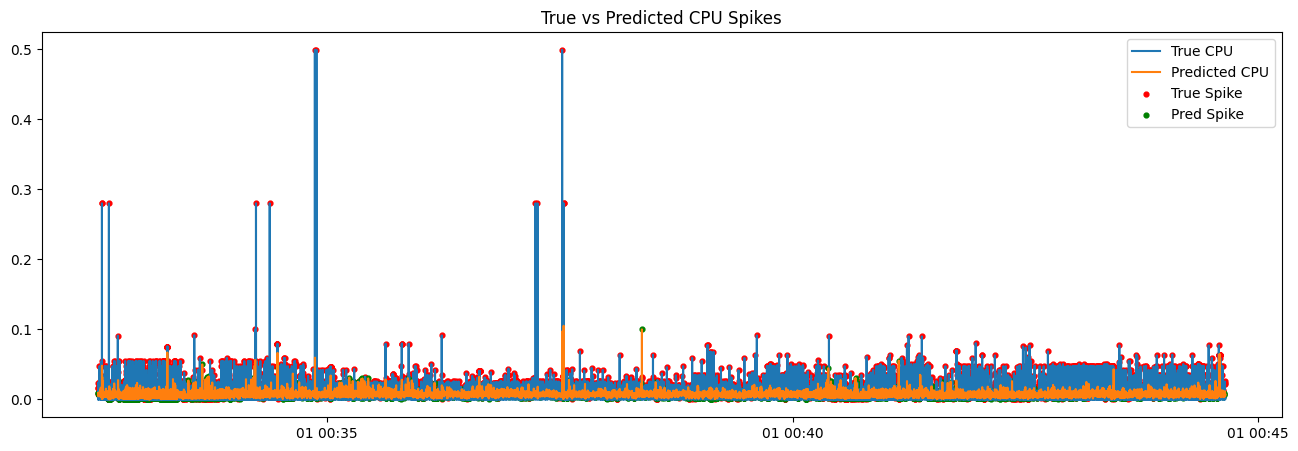

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(test["time"], test["target_future_usage"], label="True CPU")
plt.plot(test["time"], test["pred_cpu"], label="Predicted CPU")
plt.scatter(test.loc[test["spike_true"]==1, "time"],
            test.loc[test["spike_true"]==1, "target_future_usage"],
            color="red", label="True Spike", s=12)
plt.scatter(test.loc[test["spike_pred"]==1, "time"],
            test.loc[test["spike_pred"]==1, "pred_cpu"],
            color="green", label="Pred Spike", s=12)
plt.legend()
plt.title("True vs Predicted CPU Spikes")
plt.show()


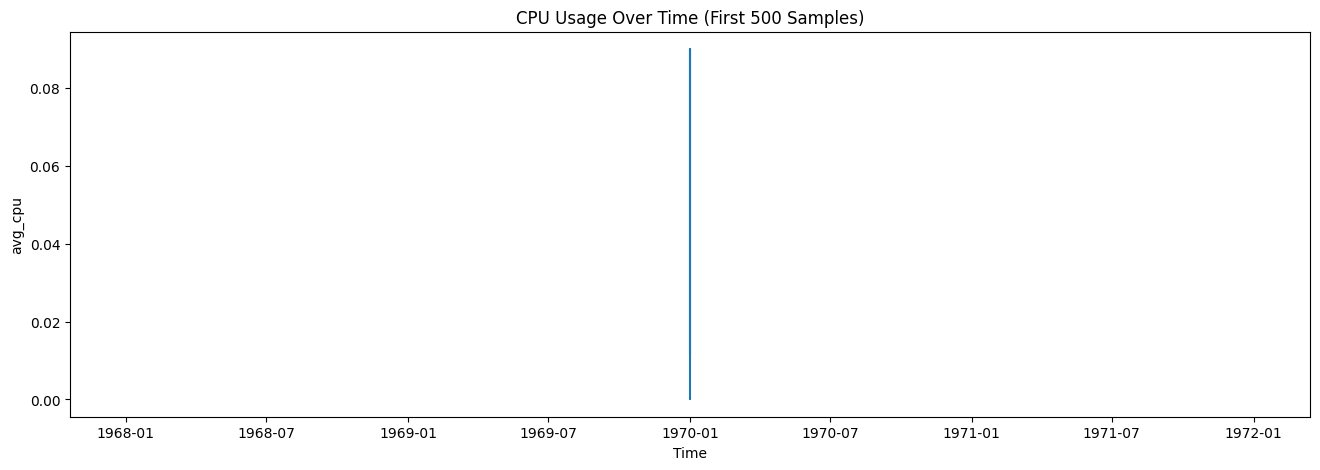

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
plt.plot(df["time"][:500], df["avg_cpu"][:500])
plt.title("CPU Usage Over Time (First 500 Samples)")
plt.xlabel("Time")
plt.ylabel("avg_cpu")
plt.show()


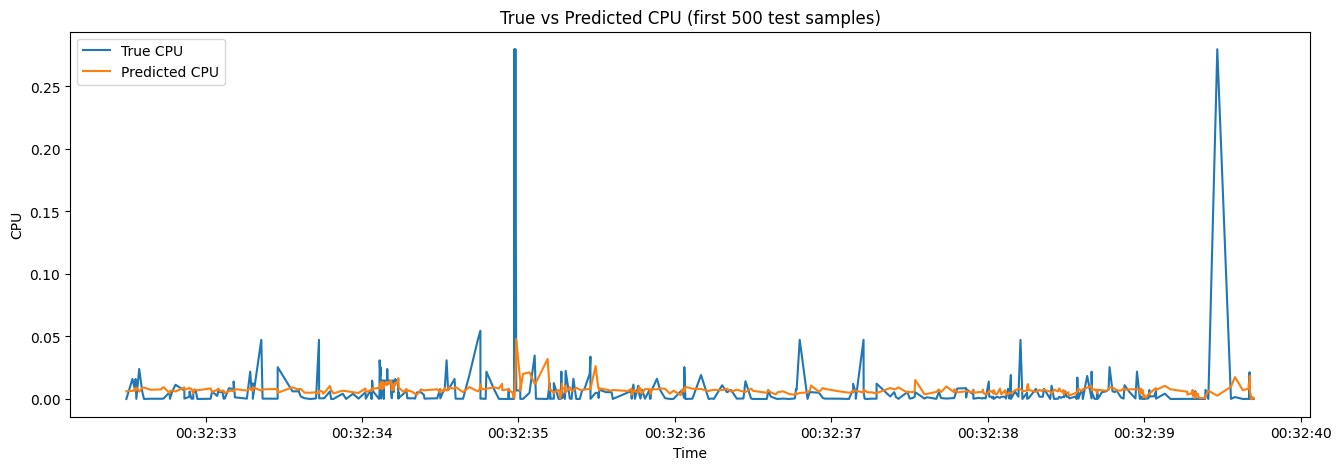

In [31]:
plt.figure(figsize=(16,5))
plt.plot(test["time"][:500], test["target_future_usage"][:500], label="True CPU")
plt.plot(test["time"][:500], test["pred_cpu"][:500], label="Predicted CPU")
plt.title("True vs Predicted CPU (first 500 test samples)")
plt.xlabel("Time")
plt.ylabel("CPU")
plt.legend()
plt.show()


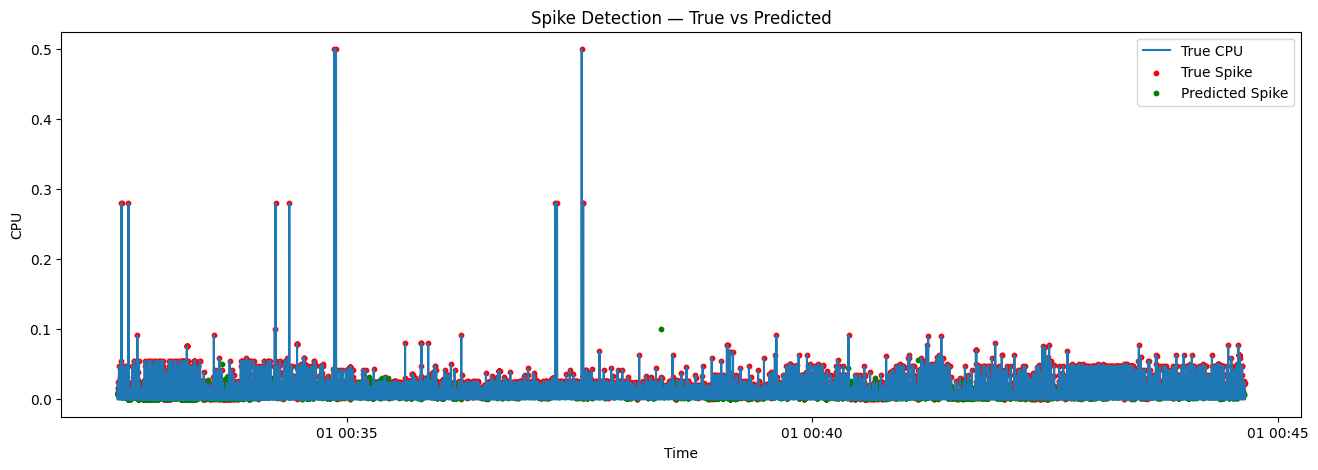

In [32]:
plt.figure(figsize=(16,5))
plt.plot(test["time"], test["target_future_usage"], label="True CPU")
plt.scatter(test.loc[test["spike_true"]==1, "time"],
            test.loc[test["spike_true"]==1, "target_future_usage"],
            color="red", s=10, label="True Spike")
plt.scatter(test.loc[test["spike_pred"]==1, "time"],
            test.loc[test["spike_pred"]==1, "pred_cpu"],
            color="green", s=10, label="Predicted Spike")
plt.title("Spike Detection — True vs Predicted")
plt.xlabel("Time")
plt.ylabel("CPU")
plt.legend()
plt.show()


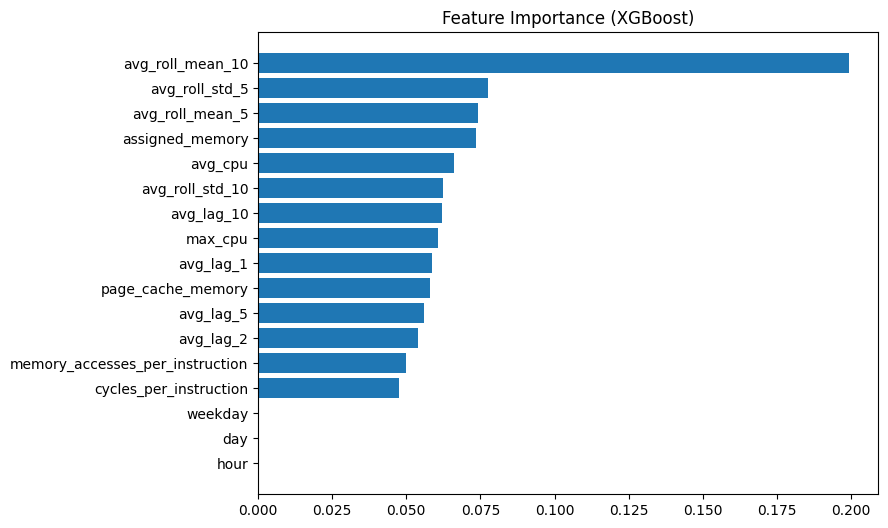

In [33]:
import numpy as np

feature_importances = xgb.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(8,6))
plt.barh(names, feature_importances[indices])
plt.title("Feature Importance (XGBoost)")
plt.gca().invert_yaxis()
plt.show()


In [34]:
sample = test.sample(10).copy()
sample["predicted_cpu"] = xgb.predict(sample[features])
sample[["time", "avg_cpu", "predicted_cpu", "target_future_usage"]]


,time,avg_cpu,predicted_cpu,target_future_usage
267381,1970-01-01 00:41:26.044074178,0.010925,0.009597,0.012253
257858,1970-01-01 00:39:45.369393630,0.001215,0.007024,0.001745
240840,1970-01-01 00:33:56.975858424,0.014954,0.008961,0.007118
255771,1970-01-01 00:39:12.711230894,0.008560,0.006661,0.000434
234116,1970-01-01 00:33:13.227458136,0.013351,0.010806,0.006096
232230,1970-01-01 00:33:03.886780505,0.000401,0.002851,0.000891
243620,1970-01-01 00:34:34.972352566,0.023560,0.014117,0.023560
260502,1970-01-01 00:40:26.349558052,0.000996,0.004829,0.000000
245622,1970-01-01 00:35:15.445508712,0.000220,0.004049,0.007118
279927,1970-01-01 00:44:16.947357787,0.005440,0.008173,0.009064


In [35]:
for i, row in sample.iterrows():
    print(f"Time: {row['time']}  |  True next CPU: {row['target_future_usage']:.5f}  |  Predicted: {row['predicted_cpu']:.5f}")


Time: 1970-01-01 00:41:26.044074178  |  True next CPU: 0.01225  |  Predicted: 0.00960
Time: 1970-01-01 00:39:45.369393630  |  True next CPU: 0.00175  |  Predicted: 0.00702
Time: 1970-01-01 00:33:56.975858424  |  True next CPU: 0.00712  |  Predicted: 0.00896
Time: 1970-01-01 00:39:12.711230894  |  True next CPU: 0.00043  |  Predicted: 0.00666
Time: 1970-01-01 00:33:13.227458136  |  True next CPU: 0.00610  |  Predicted: 0.01081
Time: 1970-01-01 00:33:03.886780505  |  True next CPU: 0.00089  |  Predicted: 0.00285
Time: 1970-01-01 00:34:34.972352566  |  True next CPU: 0.02356  |  Predicted: 0.01412
Time: 1970-01-01 00:40:26.349558052  |  True next CPU: 0.00000  |  Predicted: 0.00483
Time: 1970-01-01 00:35:15.445508712  |  True next CPU: 0.00712  |  Predicted: 0.00405
Time: 1970-01-01 00:44:16.947357787  |  True next CPU: 0.00906  |  Predicted: 0.00817


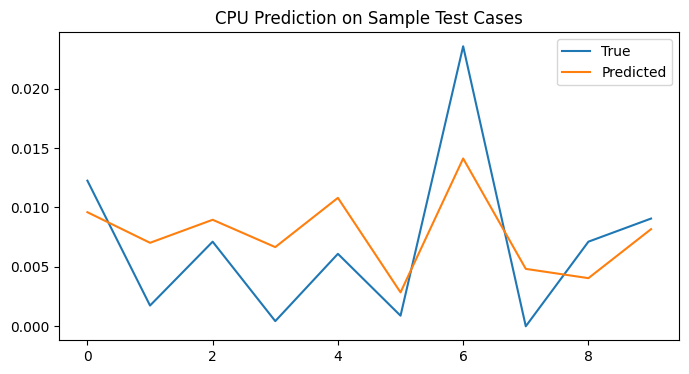

In [36]:
plt.figure(figsize=(8,4))
plt.plot(sample["target_future_usage"].values, label="True")
plt.plot(sample["predicted_cpu"].values, label="Predicted")
plt.title("CPU Prediction on Sample Test Cases")
plt.legend()
plt.show()


In [37]:
import joblib
joblib.dump(xgb, "cpu_spike_predictor.joblib")


['cpu_spike_predictor.joblib']

In [38]:
from google.colab import drive
drive.mount('/content/drive')
joblib.dump(xgb, "/content/drive/MyDrive/cpu_spike_predictor.joblib")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/cpu_spike_predictor.joblib']